<center>
    <img src="https://cdn.ticbeat.com/src/uploads/2020/08/machine-learning-mooc-810x540.jpg" width="500" />
</center>

# Regresión Lineal Simple

Tiempo estimado: **3** hora

## Objetivos

Al finalizar podrás:

-   Entender y usar regresión lineal simple
-   Crear y usar un modelo lineal
-   Manejar ciertas librerías de Python para graficar y determinar el margen de error del modelo usado



## Para entender

A continuación se da una breve explicación pero muy intuitiva del objetivo y beneficios de la regresión lineal (y multilineal).

Presiona **shift+enter** para ejecutar las lineas de código

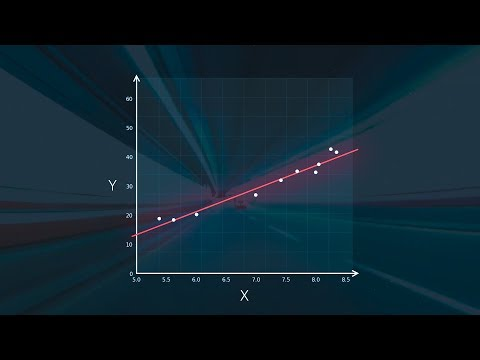

In [48]:
# import IPython.display.YouTubeVideo class.
from IPython.display import YouTubeVideo
# create an instance of YouTubeVideo class with provided youtube video id.
youtube_video = YouTubeVideo('k964_uNn3l0')
# display youtube video
display(youtube_video)

Extraído de Dot csv (Youtube)

[Mínimos cuadrados](https://www.youtube.com/embed/k964_uNn3l0?autoplay=1&mute=0)


## Coding

### Importando las librerías necesarias

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Descargar los datos

Usaremos !wget para descargar el archivo desde IBM Object Storage.


In [12]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-05-27 18:20:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2021-05-27 18:20:25 (3.48 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Características a analizar

### `FuelConsumptionCo2.csv`:

El archivo **`FuelConsumption.csv`**, contiene las sifuientes características: 

[Fuente de los datos](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Visualizar los datos

Haremos uso de la librería pandas para visualizar los datos del archivo csv


In [15]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

Podemos extraer información estadística del conjunto de datos que tenemos como desviación standard (std), media (mean) y otros.

In [16]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Podemos también ver la correlación entre algunos parámetros (aquellos que tienen valores numéricos).

In [18]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


Seleccionemos algunas características de archivo y despleguemos los primeras 9 renglones

In [20]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Podemos graficar el histograma de cada característica:

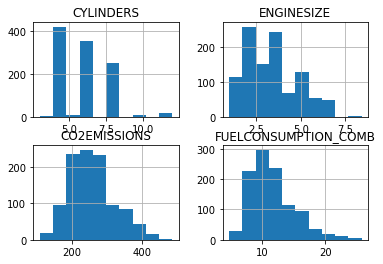

In [21]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

En una regresión lineal simple podemos graficar en 2D. Grafiquemos alguna de las características vs Emission para ver qué tan lineal es su relación:


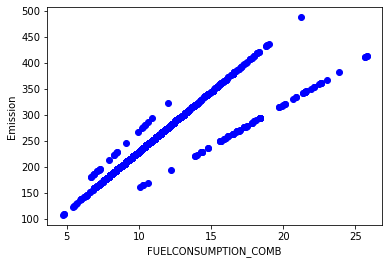

In [22]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

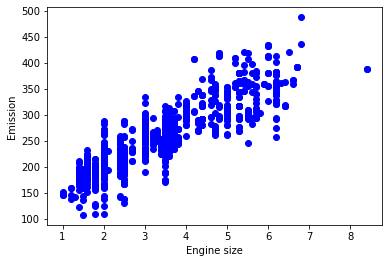

In [23]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Grafica **CYLINDER** vs Emission:


In [25]:
# write your code here


## Train/test split

En el siguiente video se explica la importancia y varias formas del train/test split:

https://mediacenter.ibm.com/media/Model+Evaluation+in+Regression+Models/0_d82ofpzl

Dividamos nuestro conjunto de datos en 80% train y 20% para test, de manera aleatoria.

In [36]:
msk = np.random.rand(len(df)) < 0.8# Create a True-False array
train = cdf[msk]
test = cdf[~msk]

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
2,1.5,4,5.9,136
10,2.4,4,9.8,225
12,5.9,12,15.6,359
26,3.0,6,10.9,251
32,3.0,6,8.4,227
...,...,...,...,...
1051,2.0,4,10.7,246
1056,2.5,5,9.7,223
1057,2.5,5,10.1,232
1059,3.2,6,10.2,235


### Modelo de regresión lineal simple

Linear Regression ajusta los datos a un modelo lineal simple con coeficientes B = (B1, ..., Bn) donde minimiza la función 'suma de cuadrados' entre el valor y (target) en nuestro dataset y el valor predicho yhat usando aproximación lineal. 


#### Train data distribution


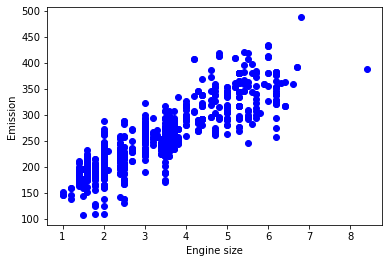

In [37]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modelando

Usamos linear_model de la librería sklearn para obtener los parámetros de una recta **y=mx+b**

In [38]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# Los coeficientes, o pendiente (m) y la intersección u ordenada al origen (b).
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.28092725]]
Intercept:  [124.68388554]


Graficamos los datos de train junto con la recta que obtuvimos

Text(0, 0.5, 'Emission')

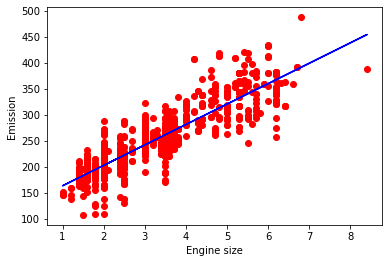

In [45]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='r')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'b')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluación de nuestro modelo

Comparemos ahora los valores reales (y) con los predichos (yhat) para así, calcular la precisión del modelo.

Hay diversas métricas de evaluación de modelo:

```
- Mean absolute error: Es la meadia de los errores del valor absoluto.
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE).
- R-squared es una métrica popular que mide la precisión de un modelo. Representa qué tan cerca están los datos reales con el modelo ajustado a una recta. Entre más cercano a 1 sea el valor de R-squared, mejor se ajusta el modelo a los datos reales.

In [47]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_hat) )

Mean absolute error: 23.81
Residual sum of squares (MSE): 927.20
R2-score: 0.78


## Actividad

En el ejmplo usamos **ENGINESIZE** y **CO2EMISSIONS** cuya correlación es de 0.8741. Realiza un modelo (modela, grafica y evalúa) con el parámetro que esté más correlacionado con **CO2EMISSIONS**, que no sea la misma variable CO2EMISSIONS.